In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# The float lenghts on a lot of these inputs is causing the output to end up in scientific notation
# Going to set a float cap to 3 decimal places for now. Can remove this if it's a problem.
pd.set_option('display.float_format', '{:.3f}'.format)
raw_df = pd.read_csv('nutritional-data.csv')

raw_df.shape

(89010, 61)

In [15]:
# Convert this to a long format so that we don't have a column for each year. 
# This drastically increases the number of rows, but makes the data much cleaner.
data_long = raw_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                      var_name='Year',
                      value_name='Amount')

data_long.shape

(5073570, 6)

In [16]:
data_long.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Amount
5034052,"Korea, Dem. People’s Rep.",PRK,Malaria cases reported,SH.STA.MALR,Unnamed: 60,NaN
1949678,Thailand,THA,"Comprehensive correct knowledge of HIV/AIDS, a...",SH.HIV.1524.KW.MA.ZS,1981,NaN
1528417,American Samoa,ASM,ARI treatment (% of children under 5 taken to ...,SH.STA.ARIC.ZS,1977,NaN
1802993,Botswana,BWA,"Age population, age 05, male, interpolated",SP.POP.AG05.MA.IN,1980,16402.000
946165,Maldives,MDV,"Malnutrition prevalence, height for age (% of ...",SH.STA.STNT.ZS,1970,NaN


In [17]:
# There's still a lot of "NaN" in the Amount column so we drop those.

clean_long_df = data_long.dropna(subset=['Amount'])
clean_long_df.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Amount
2742924,Sierra Leone,SLE,Male population 80+,SP.POP.80UP.MA,1990,3383.000
3342113,Kenya,KEN,External resources for health (% of total expe...,SH.XPD.EXTR.ZS,1997,11.587
214893,Fiji,FJI,Rural population (% of total population),SP.RUR.TOTL.ZS,1962,69.177
1811952,Cyprus,CYP,"Age population, age 0, female, interpolated",SP.POP.AG00.FE.IN,1980,6368.000
3612115,Latvia,LVA,"School enrollment, primary, male (% gross)",SE.PRM.ENRR.MA,2000,100.856
2703090,Djibouti,DJI,"Age population, age 01, male, interpolated",SP.POP.AG01.MA.IN,1990,11674.000
3869085,Guatemala,GTM,"Population ages 70-74, female (% of female pop...",SP.POP.7074.FE.5Y,2003,1.244
2886514,Gabon,GAB,"Population ages 55-59, male (% of male populat...",SP.POP.5559.MA.5Y,1992,3.036
50487,Kuwait,KWT,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,7.243
1670700,Puerto Rico,PRI,"Population ages 00-04, female (% of female pop...",SP.POP.0004.FE.5Y,1978,10.482


In [18]:
unique_categories = sorted(clean_long_df['Indicator Name'].unique())
unique_categories

['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 'AIDS estimated deaths (UNAIDS estimates)',
 'ARI treatment (% of children under 5 taken to a health provider)',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Adults (ages 15+) and children (0-14 years) living with HIV',
 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
 'Adults (ages 15+) living with HIV',
 'Adults (ages 15+) newly infected with HIV',
 'Age at first marriage, female',
 'Age at first marriage, male',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old',
 'Age dependency ratio, young',
 'Age population, age 0, female, interpolated',
 'Age population, age 0, male, interpolated',
 'Age population, age 01, female, interpolated',
 'Age population, age 01, male, i

C:\Users\dave9\AppData\Local\Temp\ipykernel_37252\2343954376.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_df, x='Year', y='Amount', ci=None, color='blue', linewidth=1, marker='o')
c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


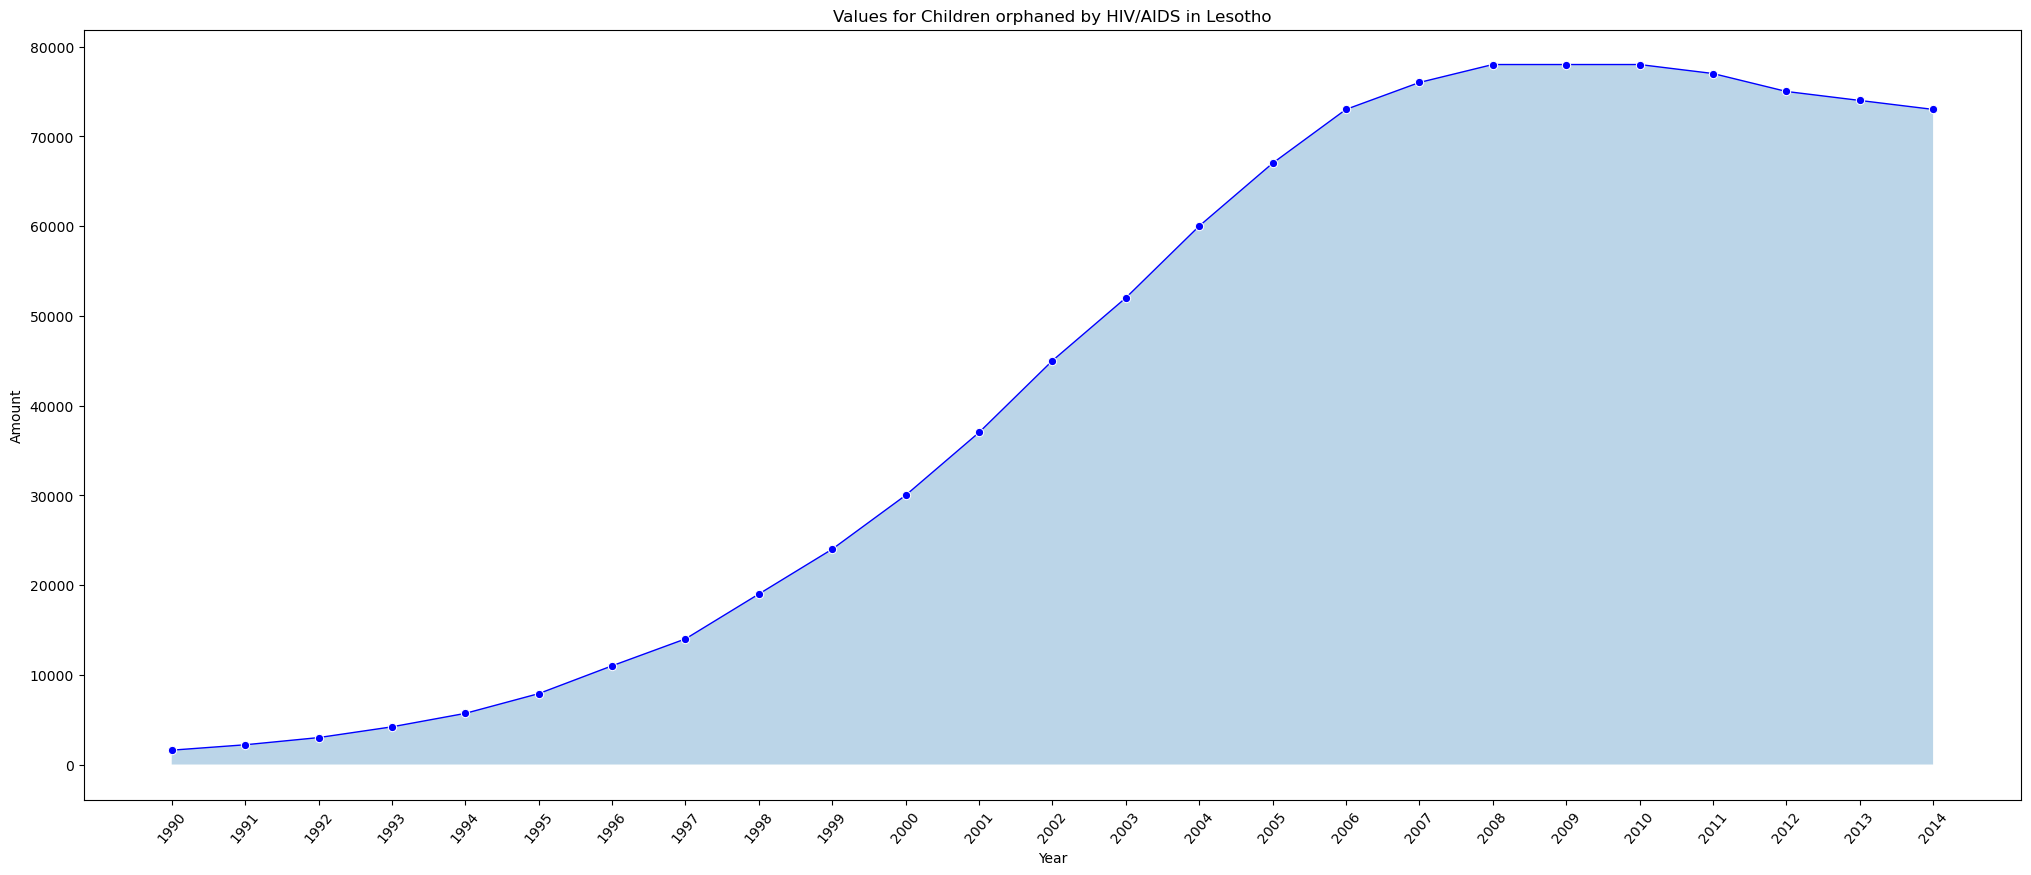

In [101]:

# Var_1 = clean_long_df[clean_long_df['Indicator Name'] == 'Community health workers (per 1,000 people)' & clean_long_df['Year']]
# Var_2 = clean_long_df[clean_long_df['Year']]
# sns.barplot(data=Var_1, x='Indicator Name', y='Year')


# Filter the DataFrame for the specific "Indicator Name"
from pyparsing import line


country_name = "Lesotho"

indicator_name = "Children orphaned by HIV/AIDS"

filtered_df = clean_long_df[(clean_long_df['Indicator Name'] == indicator_name) & (clean_long_df['Country Name'] == country_name) & (clean_long_df['Year'] != '2015')]
#df[(df['Indicator Name'] == indicator_name) & (df['Year'] != year_to_exclude)]

if filtered_df.empty:
    print(f"No data found for {indicator_name} in {country_name}")

# Melt the DataFrame to reshape it for plotting, didn't work because we already did that above.
        # melted_df = filtered_df.melt(id_vars=['Indicator Name'], var_name='Year', value_name='Amount')

max_amount = filtered_df['Amount'].max()
max_year = filtered_df[filtered_df['Amount'] == max_amount]['Year'].values[0]


plt.figure(figsize = (25, 10))
# plt.annotate(
#     '23.2 Percent in 2008',
#     xy=(max_year, max_amount),
#     xytext=(max_year, max_amount - 10),
#     arrowprops=dict(facecolor='black', shrink=0.75)
# )
sns.lineplot(data=filtered_df, x='Year', y='Amount', ci=None, color='blue', linewidth=1, marker='o')

plt.title(f'Values for {indicator_name} in {country_name}')
plt.xticks(rotation=50)
plt.fill_between(filtered_df['Year'], filtered_df['Amount'], alpha=0.3)


plt.show()


In [91]:
filtered_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Amount
2722673,Lesotho,LSO,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,1990,2.600
2811683,Lesotho,LSO,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,1991,3.600
2900693,Lesotho,LSO,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,1992,4.900
2989703,Lesotho,LSO,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,1993,6.800
3078713,Lesotho,LSO,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,1994,9.000
3167723,Lesotho,LSO,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,1995,11.500
3256733,Lesotho,LSO,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,1996,13.700
3345743,Lesotho,LSO,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,1997,15.600
3434753,Lesotho,LSO,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,1998,17.300
3523763,Lesotho,LSO,"Prevalence of HIV, total (% of population ages...",SH.DYN.AIDS.ZS,1999,18.700
